In [12]:
import joblib
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load('modelo_random_forest.pkl')
print("Modelo cargado exitosamente.")

Modelo cargado exitosamente.


In [4]:

# Cargar los datos de Device 04
try:
    base_path = r"..\DATA\Processed_Data"
    df = pd.read_csv(os.path.join(base_path, 'datos_limpios_Device04.csv'))
    print(f"Datos cargados exitosamente")
    print(df.shape)
    print(df.head(2).to_string())
    
    df['Time'] = pd.to_datetime(df['Time'])
    df.set_index('Time', inplace=True)
    df.sort_index(inplace=True)
except Exception as e:
    print(f'Se ha producido un error: {e}')

Datos cargados exitosamente
(4294, 7)
      Device                 Time   PH  ORP  Salinity  Temperature  Flow status
0  Device 04  2024-01-18 09:36:18  7.3  614      4069           27            1
1  Device 04  2024-01-18 09:46:22  7.4  630      4080           27            1


In [8]:
# Crear variables de rezago
for i in range(1, 4):  
    df[f'PH_lag_{i}'] = df['PH'].shift(i)
    df[f'ORP_lag_{i}'] = df['ORP'].shift(i)
df.dropna(inplace=True)

# Asegurarse de que la columna Predict_Cl exista en los datos del Device 04
# Si Predict_Cl fue calculada en base a otro modelo, deberías recrearla aquí de la misma manera
df['Predict_Cl'] = df['ORP'].apply(lambda x: 1 if x < 650 else 0)  # Este es un ejemplo, ajusta según tu cálculo original

# Seleccionar las características para X_nuevo
X_nuevo = df[['ORP', 'Salinity', 'Temperature', 'PH_lag_1', 'PH_lag_2', 'PH_lag_3', 
              'ORP_lag_1', 'ORP_lag_2', 'ORP_lag_3', 'Predict_Cl']]

In [10]:
# Escalar los datos de Device 04 que ya fueron tratados en el otro jupyter
scaler = StandardScaler()
X_nuevo_scaled = scaler.fit_transform(X_nuevo)

In [16]:
#PREDICCIONES
predicciones_device04 = modelo_cargado.predict(X_nuevo_scaled)
print("Predicciones del Device 04:")
print(predicciones_device04[:10])

Predicciones del Device 04:
[7.32859514 7.32887211 7.40662364 7.34750503 7.32959632 7.32599368
 7.32599368 7.32300786 7.32965686 7.32316951]


In [17]:
#COMPROBAMOS COMO DE BUENO ES EL MODELO
y_nuevo = df['PH']

# Calcular MSE, MAE y R²
mse = mean_squared_error(y_nuevo, predicciones_device04)
mae = mean_absolute_error(y_nuevo, predicciones_device04)
r2 = r2_score(y_nuevo, predicciones_device04)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R²: {r2:.4f}")

Mean Squared Error (MSE): 0.1249
Mean Absolute Error (MAE): 0.2696
R²: -1.1164


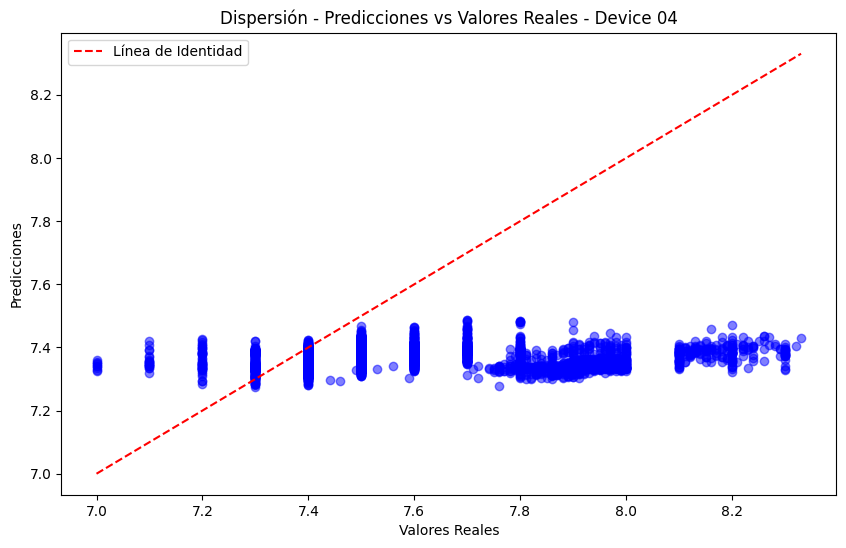

In [14]:
# Gráfico de dispersión Predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_nuevo, predicciones_device04, alpha=0.5, color='blue')
plt.plot([min(y_nuevo), max(y_nuevo)], [min(y_nuevo), max(y_nuevo)], color='red', linestyle='--', label='Línea de Identidad')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Dispersión - Predicciones vs Valores Reales - Device 04')
plt.legend()
plt.show()

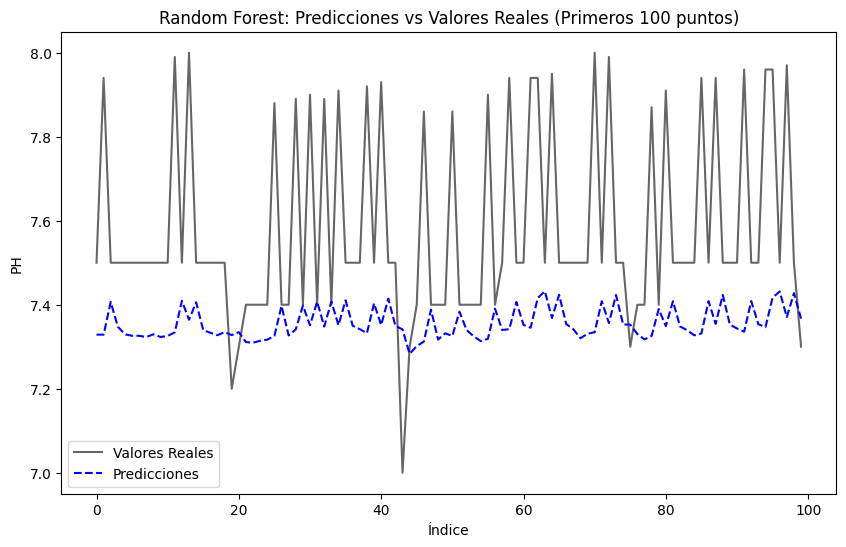

In [19]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
limite_puntos = 100

plt.plot(y_nuevo.values[:limite_puntos], label='Valores Reales', color='black', alpha=0.6)
plt.plot(predicciones_device04[:limite_puntos], label='Predicciones', linestyle='--', color='blue')
plt.title('Random Forest: Predicciones vs Valores Reales (Primeros 100 puntos)')
plt.xlabel('Índice')
plt.ylabel('PH')
plt.legend()
plt.show()